<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_05_04_survival_analysis_aalen_model_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 5.4 Aalen's Additive Regression Model


This section provides an overview of the **Aalen's Additive regression model** in survival analysis, including its key concepts, applications, and how to fit the model manually in R. We will also demonstrate how to fit the Aalen model using the `aareg()` function from the {survival} package and the `aalen()` function from the {timereg} package in R.


## Overview


The **Aalen's Additive regression model**, also known as the **Aalen’s additive hazards model**, is a statistical technique used in survival analysis. Unlike the more commonly used Cox Proportional Hazards model, which assumes a multiplicative relationship between the covariates and the hazard function, the Aalen model assumes an **additive** relationship between the covariates and the hazard function. This model is particularly useful when the proportional hazards assumption of the Cox model does not hold, meaning that the effects of covariates on survival are not constant over time.

***Key Concepts of the Aalen Model***:

1.  **Additive Hazards**:
    -   In the Aalen model, the hazard at time $t$ is expressed as the sum of contributions from the covariates. The contribution of each covariate to the hazard function can change over time, making the model more flexible than the Cox model.
    -   The hazard function $h(t)$is expressed as an additive function of the covariates.
2.  **Time-Varying Coefficients**:
    -   The Aalen model allows for **time-varying effects** of the covariates, meaning that the effect of each covariate on the hazard can change over time. This is an important feature that differentiates it from other survival models like the Cox model, which assumes constant covariate effects.
3.  **No Proportional Hazards Assumption**:
    -   The model does not rely on the proportional hazards assumption, making it more appropriate for situations where the covariates' effects vary over time.
4.  **Interpretation**:
    -   The coefficients in the Aalen model represent the **incremental effects** of the covariates on the hazard function at each time point. These coefficients are not hazard ratios, as in the Cox model, but are rather additive effects.



The Aalen additive hazards model can be written as:

$$ h(t|X) = h_0(t) + \beta_1(t) X_1 + \beta_2(t) X_2 + \dots + \beta_p(t) X_p $$

Where:

-   $h(t|X)$ is the hazard at time $t$ for an individual with covariates $X_1, X_2, \dots, X_p$.
-   $h_0(t)$ is the baseline hazard function at time $t$.
-   $\beta_1(t), \beta_2(t), \dots, \beta_p(t)$ are the **time-varying** coefficients for each covariate $X_1, X_2, \dots, X_p$, indicating how the effect of each covariate on the hazard changes over time.

***Key Differences Between the Aalen Model and Cox Model***:

1.  **Additive vs. Multiplicative**:
    -   **Aalen model**: Assumes an **additive** effect of covariates on the hazard function.
    -   **Cox model**: Assumes a **multiplicative** effect of covariates on the hazard function.
2.  **Time-Varying Coefficients**:
    -   **Aalen model**: Allows for time-varying effects of covariates (i.e., the effect of a covariate can change over time).
    -   **Cox model**: Assumes the effects of covariates (hazard ratios) are **constant over time**.
3.  **Proportional Hazards Assumption**:
    -   **Aalen model**: Does **not** require the proportional hazards assumption.
    -   **Cox model**: Requires the proportional hazards assumption (the effect of covariates on the hazard is proportional over time).
4.  **Interpretation**:
    -   **Aalen model**: Coefficients represent **additive** contributions to the hazard rate, which vary over time.
    -   **Cox model**: Coefficients represent **multiplicative** hazard ratios, which are assumed to be constant over time.

***Applications of the Aalen Model***:

1.  **Time-Varying Effects**:
    -   The Aalen model is particularly useful when the effects of covariates are expected to change over time. For example, in medical research, the effect of a treatment may change as patients progress through different stages of their disease.
2.  **Exploratory Analysis**:
    -   It is often used for exploratory analysis to check whether the proportional hazards assumption holds. If the covariate effects appear to be time-varying in the Aalen model, it suggests that the Cox model may not be appropriate.
3.  **Flexible Survival Modeling**:
    -   The model provides more flexibility than the Cox model, especially when the effects of covariates are not constant over time.

***Advantages of the Aalen Model***:

1.  **Flexibility**:
    -   The model allows for **time-varying covariate effects**, making it useful when the proportional hazards assumption does not hold.
2.  **Exploratory Tool**:
    -   It can be used to explore time-varying effects of covariates and identify whether a simpler Cox model is appropriate.
3.  **No Proportional Hazards Assumption**:
    -   It does not require the proportional hazards assumption, making it more robust in certain settings.

***Limitations***:

1.  **Interpretability**:
    -   The coefficients are harder to interpret compared to hazard ratios in the Cox model, especially because they are time-varying and represent additive effects.
2.  **Less Popular**:
    -   The Aalen model is less commonly used than the Cox model, which means there is less software support and fewer resources available for interpreting results.
3.  **Less Efficient**:
    -   If the true underlying model is multiplicative (as assumed by the Cox model), the Aalen model may be less efficient in estimating the effects of covariates.



## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316565 sha256=f47fff8b20b552b2aecc75a9f641ffba68692aa4097b76176e8d71935691b95b
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [2]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Aalen Model in R


This tutorial is mostly used two R packages [{survival}](https://cran.r-project.org/web/packages/survival/index.html), and [{timereg}](https://cran.r-project.org/web/packages/timereg/index.html/).


### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [3]:
%%R
packages <-c(
		 'tidyverse',
		 'report',
		 'performance',
		 'gtsummary',
		 'MASS',
		 'epiDisplay',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression'
		 )


### Install missing packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')


### Verify Installation

In [4]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method       from      
  print.lrtest epiDisplay

  method        from 
  nobs.multinom broom



     tidyverse         report    performance      gtsummary           MASS 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    epiDisplay       survival      survminer      ggsurvfit     tidycmprsk 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     ggfortify        timereg         cmprsk       condSURV riskRegression 
          TRUE           TRUE           TRUE           TRUE           TRUE 


### Load Packages

In [5]:
%%R
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [6]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:riskRegression" "package:condSURV"       "package:cmprsk"        
 [4] "package:timereg"        "package:ggfortify"      "package:tidycmprsk"    
 [7] "package:ggsurvfit"      "package:survminer"      "package:ggpubr"        
[10] "package:epiDisplay"     "package:nnet"           "package:survival"      
[13] "package:foreign"        "package:MASS"           "package:gtsummary"     
[16] "package:performance"    "package:report"         "package:lubridate"     
[19] "package:forcats"        "package:stringr"        "package:dplyr"         
[22] "package:purrr"          "package:readr"          "package:tidyr"         
[25] "package:tibble"         "package:ggplot2"        "package:tidyverse"     
[28] "package:tools"          "package:stats"          "package:graphics"      
[31] "package:grDevices"      "package:utils"          "package:datasets"      
[34] "package:methods"        "package:base"          


### Data


In this example, we will perform a **Aalen additive hazards model** using the `veteran` dataset from the {survival} package.


In [7]:
%%R
data(veteran)
glimpse(veteran)

Rows: 137
Columns: 8
$ trt      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ celltype <fct> squamous, squamous, squamous, squamous, squamous, squamous, s…
$ time     <dbl> 72, 411, 228, 126, 118, 10, 82, 110, 314, 100, 42, 8, 144, 25…
$ status   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0…
$ karno    <dbl> 60, 70, 60, 60, 70, 20, 40, 80, 50, 70, 60, 40, 30, 80, 70, 6…
$ diagtime <dbl> 7, 5, 3, 9, 11, 5, 10, 29, 18, 6, 4, 58, 4, 9, 11, 3, 9, 2, 4…
$ age      <dbl> 69, 64, 38, 63, 65, 49, 69, 68, 43, 70, 81, 63, 63, 52, 48, 6…
$ prior    <dbl> 0, 10, 0, 10, 10, 0, 10, 0, 0, 0, 0, 10, 0, 10, 10, 0, 0, 0, …



The dataset contains information such as:

-   `time`: Survival time in days.

-   `status`: Censoring indicator (1 = death, 0 = censored).

-   `trt`: Treatment group (1 = standard treatment, 2 = test treatment).

-   `age`: Age of the patient.

-   `celltype`: Cell type of lung cancer.

-   `karno`: Karnofsky performance score (higher is better).

-   `diagtime`: Time since diagnosis in months.

-   `prior`: Number of prior treatments.


### Fit a Aalen Model using {survival} package


`aareg()` function of {survival} package using the survival time (`time`), censoring indicator (`status)`, and several covariates such as `age`, `trt`, `celltype,` and `karno`,


In [8]:
%%R
fit.aamodel <-aareg(Surv(time, status) ~  age + trt + celltype + karno ,
                 data = veteran)
summary(fit.aamodel)


                      slope      coef se(coef)      z        p
Intercept          0.067600  3.74e-02 1.06e-02  3.540 4.00e-04
age               -0.000249 -6.86e-05 1.28e-04 -0.537 5.91e-01
trt                0.006840  2.54e-03 2.62e-03  0.971 3.32e-01
celltypesmallcell  0.015100  6.64e-03 3.40e-03  1.950 5.07e-02
celltypeadeno      0.023500  1.04e-02 4.18e-03  2.490 1.27e-02
celltypelarge     -0.000918  3.87e-04 2.85e-03  0.136 8.92e-01
karno             -0.001250 -4.54e-04 8.81e-05 -5.160 2.52e-07

Chisq=40.27 on 6 df, p=4.02e-07; test weights=aalen



The summary of the model shows the time-varying estimates for each covariate (e.g., age, treatment, cell type, and Karnofsky score).

-   If the estimates for a covariate remain roughly constant over time, it suggests that its effect on the hazard is constant.

-   If the estimates for a covariate change over time, it indicates that the covariate has a time-varying effect on survival.


In [10]:
%%R
aareg(Surv(time, status) ~  age + trt + celltype + karno ,
                 data = veteran)

Call:
aareg(formula = Surv(time, status) ~ age + trt + celltype + karno, 
    data = veteran)

  n= 137 
    80 out of 97 unique event times used

                      slope      coef se(coef)      z        p
Intercept          0.067600  3.74e-02 1.06e-02  3.540 4.00e-04
age               -0.000249 -6.86e-05 1.28e-04 -0.537 5.91e-01
trt                0.006840  2.54e-03 2.62e-03  0.971 3.32e-01
celltypesmallcell  0.015100  6.64e-03 3.40e-03  1.950 5.07e-02
celltypeadeno      0.023500  1.04e-02 4.18e-03  2.490 1.27e-02
celltypelarge     -0.000918  3.87e-04 2.85e-03  0.136 8.92e-01
karno             -0.001250 -4.54e-04 8.81e-05 -5.160 2.52e-07

Chisq=40.27 on 6 df, p=4.02e-07; test weights=aalen



We can visualize how the cumulative regression coefficients (i.e., the effect of each covariate) change over time by plotting the model.


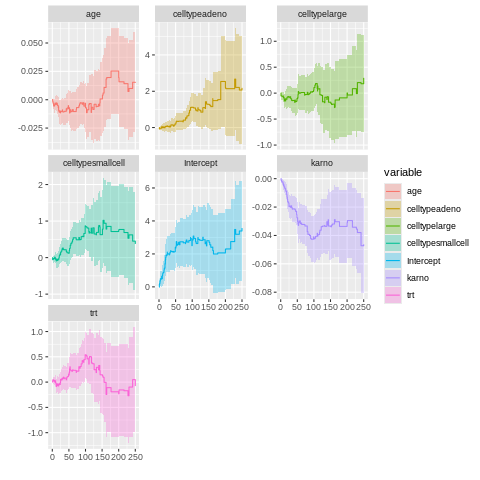

In [11]:
%%R
autoplot(fit.aamodel)


The plot shows how the cumulative effect of each covariate on the hazard function changes over time. This allows us to see whether the covariate effects are constant or time-varying.

-   **Age**: If the cumulative coefficient for `age` increases over time, it suggests that older patients have a progressively higher risk of death as time goes on.

-   **Treatment (trt)**: The plot for `trt` will show how the effect of the treatment group changes over time. If the test treatment has a decreasing or flat cumulative coefficient, it suggests a positive effect on survival.

-   **Karnofsky score (karno)**: If the cumulative coefficient for `karno` decreases, it suggests that patients with a higher Karnofsky score (better performance status) have a reduced risk of death.


### Fit a Aalen Model using {timereg} package


`aalen()` function of {timereg} package fits both the additive hazards model of **Aalen and the semi-parametric additive hazards model** of McKeague and Sasieni. Estimates are un-weighted. Time dependent variables and counting process data (multiple events per subject) are possible.

`max.time`: end of observation period where estimates are computed. Estimates thus computed from \[start.time, max.time\]. Default is max of data.

`n.sim`: number of simulations in resampling.


In [12]:
%%R
# Fit the Aalen additive hazards model
fit.aalenreg <- aalen(Surv(time, status) ~ age + trt + celltype + karno,
                      data = veteran,
                      max.time=30, #
                      n.sim=1000)

# Print the summary of the model
summary(fit.aalenreg)

Additive Aalen Model 

Test for nonparametric terms 

Test for non-significant effects 
                  Supremum-test of significance p-value H_0: B(t)=0
(Intercept)                                4.43               0.000
age                                        2.27               0.144
trt                                        1.76               0.430
celltypesmallcell                          1.65               0.473
celltypeadeno                              1.60               0.472
celltypelarge                              2.22               0.136
karno                                      5.38               0.000

Test for time invariant effects 
                        Kolmogorov-Smirnov test p-value H_0:constant effect
(Intercept)                             0.51500                       0.189
age                                     0.00422                       0.417
trt                                     0.11600                       0.165
celltypesmallcell             


To visualize how the effect of each covariate changes over time, you can plot the cumulative regression coefficients.


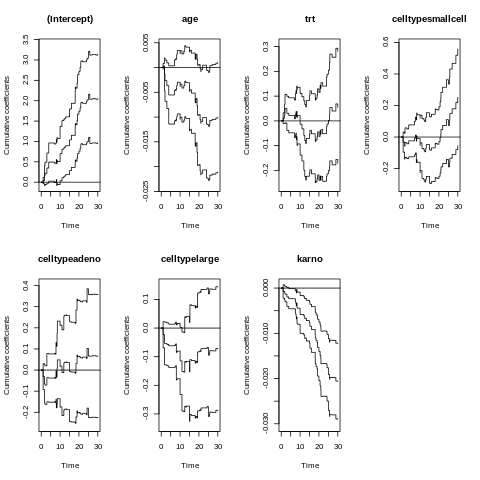

In [13]:
%%R
par(mfrow=c(2,4))
plot(fit.aalenreg)

### Interpretation of the Results


-   **Karnofsky Score (`karno`)**: A negative time-varying coefficient indicates that better performance status (higher Karnofsky score) is associated with a lower hazard of death. The cumulative coefficient shows how this effect accumulates over time.

-   **Treatment (`trt`)**: A positive or negative time-varying coefficient for the treatment group indicates whether the test treatment increases or decreases the hazard of death compared to the standard treatment.

-   **Time-Varying Effects**: If the coefficients for certain covariates change over time, it means their effects on survival are not constant, which might suggest that the effect of these covariates varies depending on how long a patient has survived.


## Summary and Conclusions


The **Aalen additive hazards model** is a flexible tool in survival analysis, allowing for **time-varying effects** of covariates on the hazard function. It provides an alternative to the Cox model, particularly when the assumption of proportional hazards does not hold. While the model’s interpretability may be more complex than the Cox model, it is a valuable tool for exploring time-dependent relationships in survival data.


## References


1.  Aalen, O.O. (1989). A linear regression model for the analysis of life times. Statistics in Medicine, 8:907-925.
2.  Aalen, O.O (1993). Further results on the non-parametric linear model in survival analysis. Statistics in Medicine. 12:1569-1588.
3.  [Survival Analysis with R](https://rviews.rstudio.com/2017/09/25/survival-analysis-with-r/)